In [1]:
'''
这里的mark改了一下。。你对自己做的是35个单词一组。

分散 103
集中 102
一次 101
206-240

后面打的mark
 10 11

  自信程度

20 - 25

'''

import os.path as op
import mne
from mne.preprocessing import ICA
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
from autoreject import AutoReject

ModuleNotFoundError: No module named 'mne.externals'

In [2]:
sub_ids = [
    'prex006','prex009','prex010','prex011','prex012',
                'prex015','prex016','prex017','prex018','prex019','prex022','prex023',
                'prex026','prex027','prex028'
                ,'prex033','prex034','prex037','prex038','prex039','prex040',
                'prex041','prex042','prex043','prex044','prex045',
                'prex046','prex047','prex048','prex049','prex050']

sub_ids = [ 'prex006' ]

evoked_original = list()
evoked_clean = list()
for sub_id,i in zip(sub_ids,range(len(sub_ids))):
    #读入之前处理好的reconst_raw
    save_path_ica = 'E:\Python LYW\RSA\spaced_learning\pre10\preprocessing\data\\4raw_ica\\'
    reconst_raw=mne.io.read_raw_fif(save_path_ica + sub_id + '.fif')
    #截取block0的时间段，每个被试不一样。。你要换个mark才行。
    #或者有什么办法读取一个segment。
    # reconst_raw = reconst_raw.crop(tmax = 515.480)
    # reconst_raw = reconst_raw.crop(tmax = 1159.360)
    #这个是被试测试一的。
    #epoch
    target_events = {
                     'Stimulus/S101':101, 'Stimulus/S102':102, 'Stimulus/S103':103,
                     'Stimulus/S 10':10,'Stimulus/S 11':11,'Stimulus/S 20':20 ,
                     'Stimulus/S 21':21,'Stimulus/S 22':22,'Stimulus/S 23':23,
                     'Stimulus/S 24':24,'Stimulus/S 25':25}

    #先找events，epoch和average都是一步的事情。
    custom_mapping = target_events
    (events_from_annot,
     event_dict) = mne.events_from_annotations(reconst_raw, event_id=custom_mapping)
    #还不如直接对 events_from_annot 进行切片
    #先遍历，把合适的单词筛序出来
    #对应的vocabulary已经列出，然后怎么提取呢？
    events=[]

    voc_mark = 103
            # print(voc_mark)
            #遍历所有，再做一次筛选mark
    for j_event in range(len(events_from_annot)-1):
                # if ((events_from_annot[j_event,2] == voc_mark and events_from_annot[j_event+1,2] == 16)or(events_from_annot[j_event,2]==voc_mark and events_from_annot[j_event+1,2]==11)):
                #全部叠加，不考虑是否能够recognize。
        if events_from_annot[j_event,2] == voc_mark and events_from_annot[j_event+1,2] == 11 and events_from_annot[j_event+2,2]>=21:
            events.append(events_from_annot[j_event,:])
            print(events_from_annot[j_event,:])
        count_remembered_events = len(events)
        #取全部event对应的epochs
    # _, eog_scores= icas[i].find_bads_eog(raws[i])
    # ica.plot_scores(eog_scores)
    #顺带对比ica前后的效果。
    epochs = mne.Epochs(reconst_raw, events,baseline =(-0.2,0), tmin=-0.2, tmax=0.8, event_id=None,
                        preload=True, event_repeated='merge')

    save_path_epoch = 'E:\Python LYW\RSA\spaced_learning\pre10\preprocessing\data\\5epoch\\'
    epochs.save(save_path_epoch + sub_id + 'S-epo.fif', overwrite=True)


    #用autoreject处理一下
    n_interpolates = np.array([1, 4, 32])
    consensus_percs = np.linspace(0, 0.8, 11)
    picks = mne.pick_types(epochs.info, meg=False, eeg=True, stim=False, eog=False,
                           include=[], exclude=[])
    ar = AutoReject(n_interpolates,consensus_percs,picks=picks,
                    thresh_method='random_search',random_state=23)
    ar.fit(epochs)
    epochs_clean = ar.transform(epochs)


    #先average看下结果，对比
    #如果结果不错就可以分别保存下来。

    evoked_original.append(epochs.average())
    evoked_clean.append(epochs_clean.average())

    save_path_epoch_clean = 'E:\Python LYW\RSA\spaced_learning\pre10\preprocessing\data\\6epoch_clean\\'
    epochs_clean.save(save_path_epoch_clean + sub_id + 'S-epo.fif', overwrite=True)
    save_path_evoked = 'E:\Python LYW\RSA\spaced_learning\pre10\preprocessing\data\\7evoked\\'
    evoked_clean[i].save(save_path_evoked + sub_id + 'S-ave.fif')
    #
    # fig_original = evoked_original[i].plot(window_title = sub_id)
    # fig_original.savefig(save_path_evoked+'S_original_' + sub_id)
    # fig_clean = evoked_clean[i].plot(window_title = sub_id)
    # fig_clean.savefig(save_path_evoked+'S_clean_'+ sub_id, overwrite = True)


Opening raw data file E:\Python LYW\RSA\spaced_learning\pre10\preprocessing\data\4raw_ica\prex006.fif...


C:\Users\SILVER~1\AppData\Local\Temp/ipykernel_3240/2346264442.py:16: RuntimeWarning: This filename (E:\Python LYW\RSA\spaced_learning\pre10\preprocessing\data\4raw_ica\prex006.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  reconst_raw=mne.io.read_raw_fif(save_path_ica + sub_id + '.fif')


    Range : 0 ... 1027529 =      0.000 ...  2055.058 secs
Ready.
Used Annotations descriptions: ['Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 23', 'Stimulus/S 24', 'Stimulus/S 25', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103']
[36021     0   103]
[52271     0   103]
[58462     0   103]
[77187     0   103]
[80303     0   103]
[83262     0   103]
[90295     0   103]
[93295     0   103]
[100019      0    103]
[107377      0    103]
[142318      0    103]
[158909      0    103]
[161992      0    103]
[207000      0    103]
[242282      0    103]
[258323      0    103]
[265673      0    103]
[293688      0    103]
[318588      0    103]
[324604      0    103]
[331212      0    103]
[347579      0    103]
[353462      0    103]
[365561      0    103]
[399769      0    103]
[425676      0    103]
[435634      0    103]
[463083      0    103]
[504882      0    103]
[514565      0    103]
[524790      0    103]
[541214      0    103]
[584

NameError: name 'AutoReject' is not defined

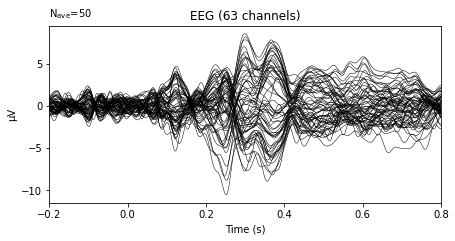

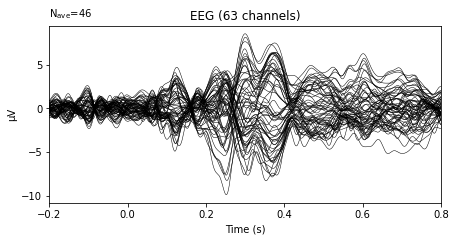

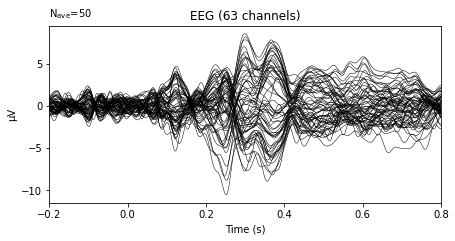

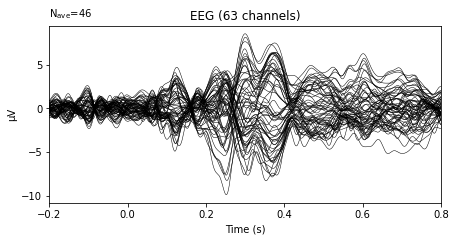

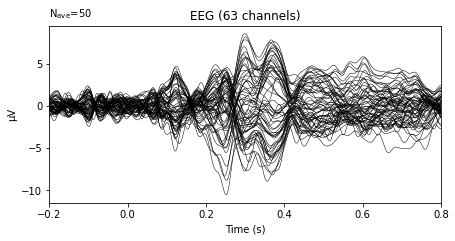

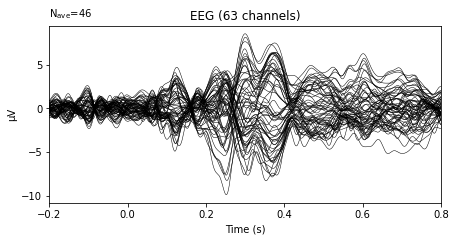

In [9]:
fig_original = evoked_original[i].plot(window_title = sub_id)
fig_original.savefig(save_path_evoked+'M_original_' + sub_id)
fig_clean = evoked_clean[i].plot(window_title = sub_id)
fig_clean.savefig(save_path_evoked+'M_clean_'+ sub_id)

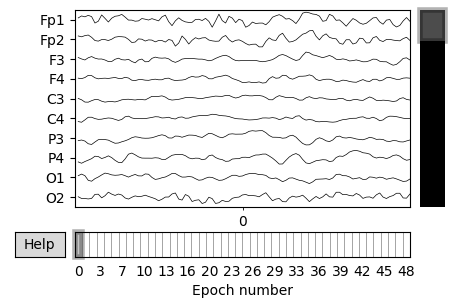

In [14]:
%matplotlib qt

epochs_clean.plot(n_epochs = 1, n_channels = 10)

In [ ]:
c